<a href="https://colab.research.google.com/github/Joaovtmendes/Data-analysis-CBS/blob/main/Report_CBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Packages Used

In [79]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Extraction

In [80]:
file_url = "https://docs.google.com/spreadsheets/d/1TDdpceBXNvfffLtIQmLipTZi_81JvRSG/export?format=xlsx"
df_receitas = pd.read_excel(file_url, engine='openpyxl')

In [81]:
len(df_receitas)

1311

In [82]:
df_receitas.head(10)

,Unnamed: 0,Data,Descrição,Valor,Tipo,mensalidade,receita,Unnamed: 7,Unnamed: 8,Unnamed: 9,LTV,Ticket médio,Média de tempo de retenção de clientes,Unnamed: 13,Total de Clientes,Quantidade de Vendas,Total de Vendas
0,37,2023-02-01,#CLIENTE#23001,367.73,Crédito,367.73,0.00,NaN,#CLIENTE#23001,15.0,3104.989391,344.998821,9.0,NaN,143.0,1298.0,447808.47
1,115,2023-03-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23002,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,194,2023-04-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23003,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,279,2023-05-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23004,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,358,2023-06-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23005,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,438,2023-07-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23006,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,516,2023-08-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23007,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,603,2023-09-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23008,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,698,2023-10-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23009,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,789,2023-11-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23010,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transformation

In [83]:
# Dropar a coluna Unnamed
df_receitas.drop(columns = ['Unnamed: 0'], inplace=True)

In [84]:
# Filtrar apenas os clientes (formato #CLIENTE...)
df_receitas['is_client'] = df_receitas['Descrição'].str.contains('#CLIENTE#\d*', regex=True)

In [85]:
len(df_receitas[df_receitas['is_client']==False])

13

In [86]:
df_receitas[df_receitas['is_client']==False].head(13)

,Data,Descrição,Valor,Tipo,mensalidade,receita,Unnamed: 7,Unnamed: 8,Unnamed: 9,LTV,Ticket médio,Média de tempo de retenção de clientes,Unnamed: 13,Total de Clientes,Quantidade de Vendas,Total de Vendas,is_client
1298,2023-12-01,Aluguel de sala,750.00,Dinheiro,750.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1299,2024-01-21,Aluguel de sala,750.00,Dinheiro,0.00,750.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1300,2023-01-19,Depósito,375.26,Aporte pessoal,375.26,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1301,2023-06-14,Depósito,146.87,Aporte pessoal,0.00,146.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1302,2023-07-19,Espetáculo de Inverno,6948.14,Espetáculo,6948.14,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1303,2023-12-26,Espetáculo de fim de ano,21213.05,Espetáculo,21213.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1304,2023-02-28,Rendimentos conta Mercado Pago,44.18,Investimento,44.18,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1305,2023-03-31,Rendimentos conta Mercado Pago,37.44,Investimento,0.00,37.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1306,2023-02-28,Venda de Uniforme,734.63,Dinheiro,734.63,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1307,2023-03-01,Venda de Uniforme,140.00,Dinheiro,0.00,140.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [87]:
# Excluir essas linhas
df_receitas = df_receitas.loc[df_receitas["is_client"] == True]

In [88]:
len(df_receitas)

1298

In [89]:
df_receitas.drop(columns = 'is_client', inplace=True)

<ipython-input-89-e30da251a255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_receitas.drop(columns = 'is_client', inplace=True)


Agora temos apenas clientes no campo "Descrição"

## Analysis: Students by Month (2023 - 2024)

In [90]:
df_receitas.groupby(["Descrição"]).count()['mensalidade']

,mensalidade
Descrição,
#CLIENTE#23001,15
#CLIENTE#23002,16
#CLIENTE#23003,16
#CLIENTE#23004,12
#CLIENTE#23005,9
...,...
#CLIENTE#24025,1
#CLIENTE#24026,1
#CLIENTE#24027,2


In [91]:
df_receitas.dtypes

,0
Data,datetime64[ns]
Descrição,object
Valor,float64
Tipo,object
mensalidade,float64
receita,float64
Unnamed: 7,float64
Unnamed: 8,object
Unnamed: 9,float64
LTV,float64


In [92]:
df_receitas['Data_mes'] = df_receitas['Data'].dt.strftime('%Y-%m')

####Group customers by year and month:

In [93]:
df_receitas.groupby("Data_mes").count()['mensalidade']

,mensalidade
Data_mes,
2023-01,36
2023-02,76
2023-03,77
2023-04,84
2023-05,79
2023-06,79
2023-07,76
2023-08,87
2023-09,94


In [94]:
query = df_receitas.groupby("Data_mes").count().reset_index()

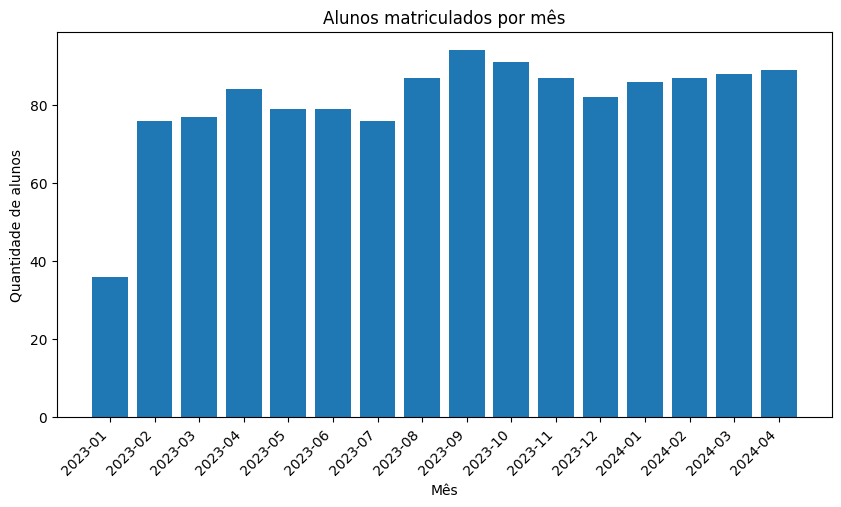

In [95]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(x = query['Data_mes'], height = query['mensalidade'])
plt.xticks(rotation=45, ha='right');
plt.title('Alunos matriculados por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de alunos');

In [96]:
df_receitas.head()

,Data,Descrição,Valor,Tipo,mensalidade,receita,Unnamed: 7,Unnamed: 8,Unnamed: 9,LTV,Ticket médio,Média de tempo de retenção de clientes,Unnamed: 13,Total de Clientes,Quantidade de Vendas,Total de Vendas,Data_mes
0,2023-02-01,#CLIENTE#23001,367.73,Crédito,367.73,0.00,NaN,#CLIENTE#23001,15.0,3104.989391,344.998821,9.0,NaN,143.0,1298.0,447808.47,2023-02
1,2023-03-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23002,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03
2,2023-04-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23003,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04
3,2023-05-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23004,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05
4,2023-06-01,#CLIENTE#23001,367.73,Crédito,0.00,367.73,NaN,#CLIENTE#23005,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06


####Analysis: Revenue per month

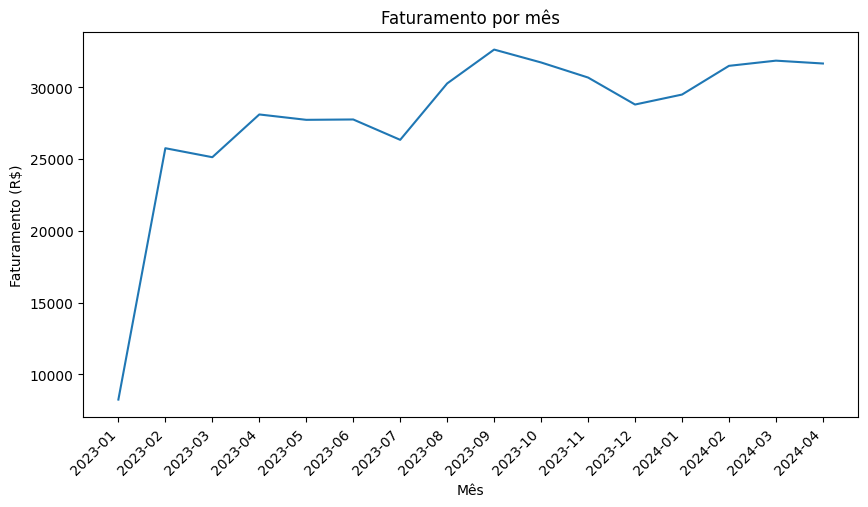

In [97]:
query = df_receitas.groupby("Data_mes").agg({'Valor': 'sum'})

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(query.index, query['Valor'])
plt.xticks(rotation=45, ha='right');
plt.title('Faturamento por mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)');

Text(0.5, 1.0, 'Alunos matriculados por mês - 2023')

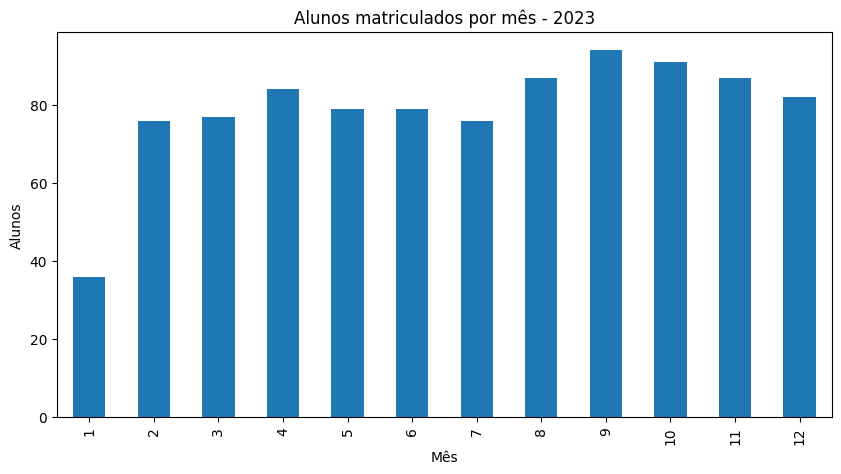

In [98]:
df_receitas['Data'][df_receitas['Data'] < '2024-01-01'].dt.month\
.value_counts().sort_index().plot(kind='bar', xlabel = 'Mês', ylabel = 'Alunos')\
.set_title('Alunos matriculados por mês - 2023')

##CRM Base - Funnel Analysis

In [99]:
CRM_file_url = "https://docs.google.com/spreadsheets/d/12iqN7dGCganICB0_BBJwAlHagKcAgjEP/export?format=xlsx"
df_CRM= pd.read_excel(CRM_file_url, engine='openpyxl')


In [100]:
df_CRM.head()

,CRM - Gerenciamento de Relacionamento com o Cliente,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,NaN
1,1,2021-01-05 00:00:00,ENIALE RAMOS QUINTINO (MÃE ELAINE),11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaN,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN,NaN
2,2,2022-01-07 00:00:00,Camila,ADULTO,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaN,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN
3,3,2021-01-05 00:00:00,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN,NaN
4,4,2021-01-07 00:00:00,LIDYA STELLA ALVES REIS MACIEL (Contato Adriano),12,99715-9344,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,MATRICULADO,NaN,MATRICULADO,NaN,NaN


#### CRM database transformations

Header correction

In [101]:
header = df_CRM.iloc[0]
df_CRM = df_CRM[1:]
df_CRM.columns = header

In [102]:
df_CRM.head()

,QTDE,DATA 1º CONTATO,NOME COMPLETO,IDADE,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,HORÁRIO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,NaN
1,1,2021-01-05 00:00:00,ENIALE RAMOS QUINTINO (MÃE ELAINE),11,99124-9509,AULA EXPERIMENTAL,WHATS,JAZZ,NaN,17H00,LIA,MATRICULADO,NaN,MATRICULADO,NaN,NaN
2,2,2022-01-07 00:00:00,Camila,ADULTO,11 94129-6714,INFORMAÇÕES,WHATSAPP,JAZZ,NaN,19H30,LIA,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN
3,3,2021-01-05 00:00:00,MAIARA GOUVEA,16,98841-5432,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,NÃO FICOU,NaN,NÃO RESPONDE,NaN,NaN
4,4,2021-01-07 00:00:00,LIDYA STELLA ALVES REIS MACIEL (Contato Adriano),12,99715-9344,AULA EXPERIMENTAL,WHATS,K-POP,NaN,19H00,ALISSON,MATRICULADO,NaN,MATRICULADO,NaN,NaN
5,5,2022-01-07 00:00:00,Bia,ADULTO,12 98129-7939,INFORMAÇÕES,WHATSAPP,MODALIDADES,NaN,-,-,NÃO,NaN,SEMANA SOLIDÁRIA,NaN,NaN


Let's eliminate some columns that are irrelevant to this analysis.

In [103]:
df_CRM.drop(columns = ['OBSERVAÇÕES',
                       'REAGENDAMENTO',
                       'PROFESSOR',
                       'HORÁRIO',
                       'DATA AGENDAMENTO',
                       'TELEFONE',
                       'NOME COMPLETO',
                       'QTDE'
                       ], inplace = True)

In [104]:
# Eliminar a coluna "NaN"
df_CRM = df_CRM.iloc[:, 0:7]

In [105]:
df_CRM.head()

,DATA 1º CONTATO,IDADE,STATUS,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
1,2021-01-05 00:00:00,11,AULA EXPERIMENTAL,WHATS,JAZZ,MATRICULADO,MATRICULADO
2,2022-01-07 00:00:00,ADULTO,INFORMAÇÕES,WHATSAPP,JAZZ,NÃO,SEMANA SOLIDÁRIA
3,2021-01-05 00:00:00,16,AULA EXPERIMENTAL,WHATS,K-POP,NÃO FICOU,NÃO RESPONDE
4,2021-01-07 00:00:00,12,AULA EXPERIMENTAL,WHATS,K-POP,MATRICULADO,MATRICULADO
5,2022-01-07 00:00:00,ADULTO,INFORMAÇÕES,WHATSAPP,MODALIDADES,NÃO,SEMANA SOLIDÁRIA


In [106]:
df_CRM.shape

(1679, 7)

1679 linhas

In [107]:
df_CRM.nunique()

,0
0,
DATA 1º CONTATO,535
IDADE,93
STATUS,10
VIA,13
ESTILOS,49
COMPARECEU,56
SITUAÇÃO,232


In [108]:
df_CRM.groupby('STATUS').count()

,DATA 1º CONTATO,IDADE,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
STATUS,,,,,,
AULA AVULSA,3,3,3,3,3,3
AULA ESPERIMENTAL,1,1,1,1,1,1
AULA EXPERIMENTAL,891,869,891,891,880,878
CAPTAÇÃO,62,59,62,62,62,62
COREOGRAFIA,1,1,1,1,1,1
INFORMACOES,1,1,1,1,1,1
INFORMAÇOES,1,1,1,1,1,1
INFORMAÇÃO,1,1,1,1,1,1
INFORMAÇÕES,709,494,709,705,705,702


As we can see, there are several lines that represent the same thing (information). Let's standardize this to "INFORMATION" and "EXPERIMENTAL CLASS"

In [109]:
for i in ['INFORMACOES', 'INFORMAÇOES', 'INFORMAÇÃO']:
  df_CRM['STATUS'] = df_CRM['STATUS'].str.replace(i, 'INFORMAÇÕES')

In [110]:
df_CRM['STATUS'] = df_CRM['STATUS'].str.replace('INFORMAÇÕES ', 'INFORMAÇÕES')

In [111]:
df_CRM['STATUS'] = df_CRM['STATUS'].str.replace('AULA ESPERIMENTAL', 'AULA EXPERIMENTAL')

In [112]:
df_CRM.groupby('STATUS').count()

,DATA 1º CONTATO,IDADE,VIA,ESTILOS,COMPARECEU,SITUAÇÃO
STATUS,,,,,,
AULA AVULSA,3,3,3,3,3,3
AULA EXPERIMENTAL,892,870,892,892,881,879
CAPTAÇÃO,62,59,62,62,62,62
COREOGRAFIA,1,1,1,1,1,1
INFORMAÇÕES,715,500,715,711,711,708


In [113]:
df_CRM.groupby('SITUAÇÃO').count()

,DATA 1º CONTATO,IDADE,STATUS,VIA,ESTILOS,COMPARECEU
SITUAÇÃO,,,,,,
-,13,13,13,13,13,13
"2 ANOS DE IDADE, MUITO PEQUENA PRA AULA.",1,1,1,1,1,1
2º SEMESTRE,3,3,3,3,3,3
"ADOROU, VAI FECHAR EM AGOSTO!",1,1,1,1,1,1
AGENDADO,28,28,28,28,28,24
...,...,...,...,...,...,...
VEIO 19/07 - vai pensar e retorna,1,1,1,1,1,1
VEIO 23/06 - NÃO VAI FICAR,2,1,2,2,2,2
VEIO 27/08,1,1,1,1,1,1


As the granularity is too small for the 'STATUS' column (there are 232 distinct values), I will use the 'STATUS' column to perform the funnel analysis.

In [114]:
funil = df_CRM.groupby('STATUS').count()['VIA'].sort_values(ascending=False).head(10)

In [115]:
funil

,VIA
STATUS,
AULA EXPERIMENTAL,892
INFORMAÇÕES,715
CAPTAÇÃO,62
AULA AVULSA,3
COREOGRAFIA,1


In [116]:
topo_funil = funil['AULA EXPERIMENTAL']
meio_funil = funil['INFORMAÇÕES']
fundo_funil = funil['CAPTAÇÃO']

In [117]:
df_funil = pd.DataFrame({'Labels': ['AULA EXPERIMENTAL','INFORMAÇÕES','CAPTAÇÃO'],\
                         'Values': [topo_funil, meio_funil, fundo_funil]\
                         })

In [118]:
df_funil.head()

,Labels,Values
0,AULA EXPERIMENTAL,892
1,INFORMAÇÕES,715
2,CAPTAÇÃO,62


Plot funil

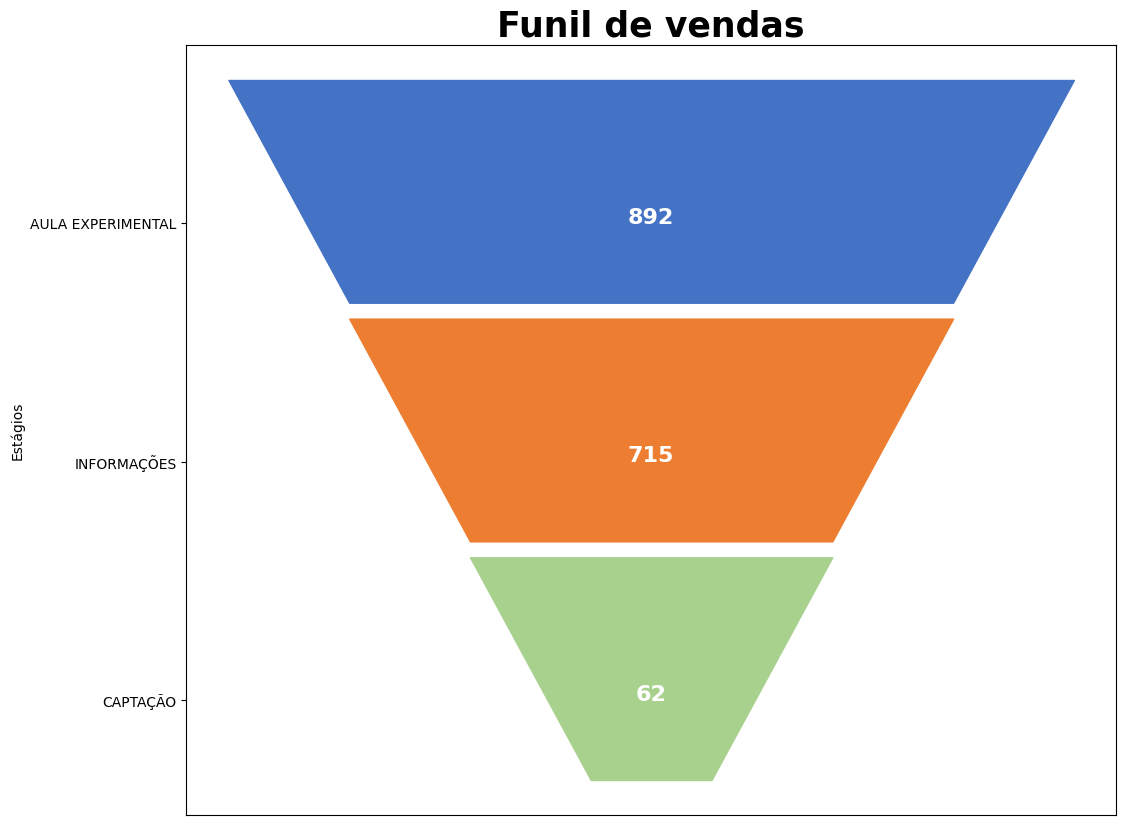

In [119]:
colors = ["#a9d18e", "#ed7d31", "#4472c4"]

fig = plt.figure(figsize=(12,10))

plt.fill_betweenx(y=[1, 3.8], x1=[10,12], x2=[8,6], color=colors[0]);
plt.fill_betweenx(y=[4, 6.8], x1=[12,14], x2=[6,4], color=colors[1]);
plt.fill_betweenx(y=[7, 9.8], x1=[14,16], x2=[4,2], color=colors[2]);

plt.xticks([],[]);
plt.yticks([2,5,8], df_funil["Labels"][::-1]);

for y, value in zip([2,5,8], df_funil["Values"][::-1]):
    plt.text(9, y, value, fontsize=16, fontweight="bold", color="white", ha="center");

plt.ylabel("Estágios");
plt.title("Funil de vendas", loc="center", fontsize=25, fontweight="bold");

## Forecast model

In [120]:
df_forecast = df_receitas.groupby("Data_mes").agg({'Valor': 'sum'})

In [121]:
df_forecast.head()

,Valor
Data_mes,
2023-01,8247.98
2023-02,25763.75
2023-03,25137.03
2023-04,28116.11
2023-05,27741.61


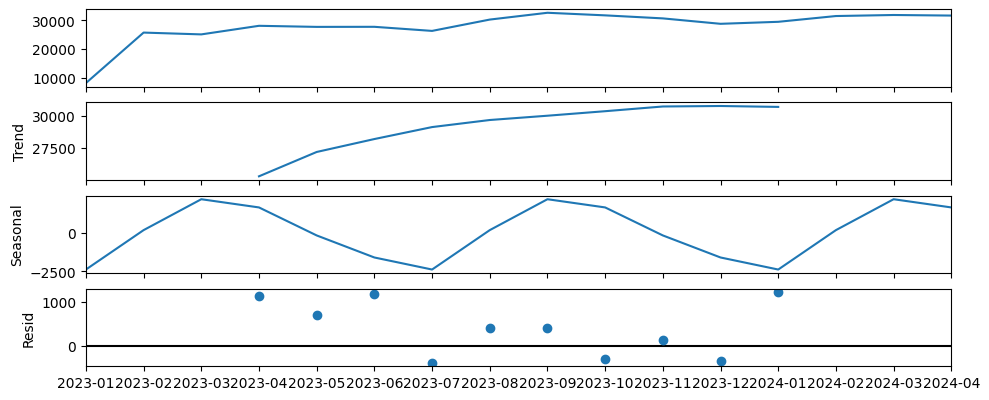

In [122]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(df_forecast,model="add",period=6);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [123]:
!pip install pmdarima

In [124]:
steps=-4
df_forecast["Actual"]=df_forecast.shift(steps)

In [125]:
df_forecast.head(10)

,Valor,Actual
Data_mes,,
2023-01,8247.98,27741.61
2023-02,25763.75,27766.49
2023-03,25137.03,26347.82
2023-04,28116.11,30277.38
2023-05,27741.61,32637.23
2023-06,27766.49,31738.58
2023-07,26347.82,30688.23
2023-08,30277.38,28807.96
2023-09,32637.23,29502.22


In [126]:
df_forecast.tail()

,Valor,Actual
Data_mes,,
2023-12,28807.96,31666.82
2024-01,29502.22,NaN
2024-02,31503.91,NaN
2024-03,31865.35,NaN
2024-04,31666.82,NaN


In [127]:
train_size=int((len(df_forecast)+steps)*0.75)
test_size = int(len(df_forecast)+steps) - train_size
train_X, train_y = df_forecast['Valor'][:train_size], df_forecast['Actual'][:train_size]
test_X, test_y = df_forecast['Valor'][train_size:(len(df_forecast)+steps)],\
 df_forecast['Actual'][train_size:(len(df_forecast)+steps)]

In [128]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y,
 exogenous= train_X,
 start_p=1, start_q=1,
 max_p=7, max_q=7,
 d=1, max_d=7,
 trace=True,
 error_action="ignore",
 suppress_warnings=True,
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=150.857, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=147.409, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=149.408, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=149.407, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=145.517, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.772 seconds


In [129]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y,
 exog=train_X,
 order=(0,1,0),
 enforce_invertibility=False, enforce_stationarity=False)

In [131]:
results = model.fit()

In [132]:
predictions= results.predict(start =0, end = train_size+test_size-1, exog=test_X)

In [133]:
step_forecast = len(df_forecast) - train_size - test_size +1

In [134]:
forecast = results.forecast(steps=step_forecast-1, exog= df_forecast[df_forecast.index >= '2024-01']['Valor'])

In [135]:
str_data = '2023-00'

for i in range(1, 13):
  str_data = str_data[:-2]
  str_data += '0'+str(i) if i < 10 else str(i)
  df_forecast.loc[str_data,'Pred'] = predictions[i-1]


In [136]:
df_forecast.loc['2024-01','Forecast'] = forecast[0] + 2000
df_forecast.loc['2024-02','Forecast'] = forecast[1] + 2000
df_forecast.loc['2024-03','Forecast'] = forecast[2] + 2000
df_forecast.loc['2024-04','Forecast'] = forecast[3] + 2000

#### Forecast results

In [137]:
df_forecast[df_forecast.index > '2023-01'][['Pred','Actual']]

,Pred,Actual
Data_mes,,
2023-02,31753.910703,27766.49
2023-03,27622.928564,26347.82
2023-04,27030.231608,30277.38
2023-05,30191.594070,32637.23
2023-06,32642.929209,31738.58
2023-07,31413.608238,30688.23
2023-08,31588.366069,28807.96
2023-09,29348.525891,29502.22
2023-10,29296.368129,31503.91


## Forecast for the next 4 months

In [138]:
months = ['May', 'Jun', 'Jul', 'Aug']
count = 0
for line in df_forecast[df_forecast['Forecast'].notnull()]['Forecast']:
  print(f"{months[count]}: {line}")
  count+=1

May: 30784.089833559738
Jun: 31242.612764224014
Jul: 31325.407067067757
Aug: 31279.930216294273


In [139]:
df_forecast.loc['2023-12','Forecast'] = df_forecast.loc['2023-12','Pred']

<Axes: xlabel='Data_mes'>

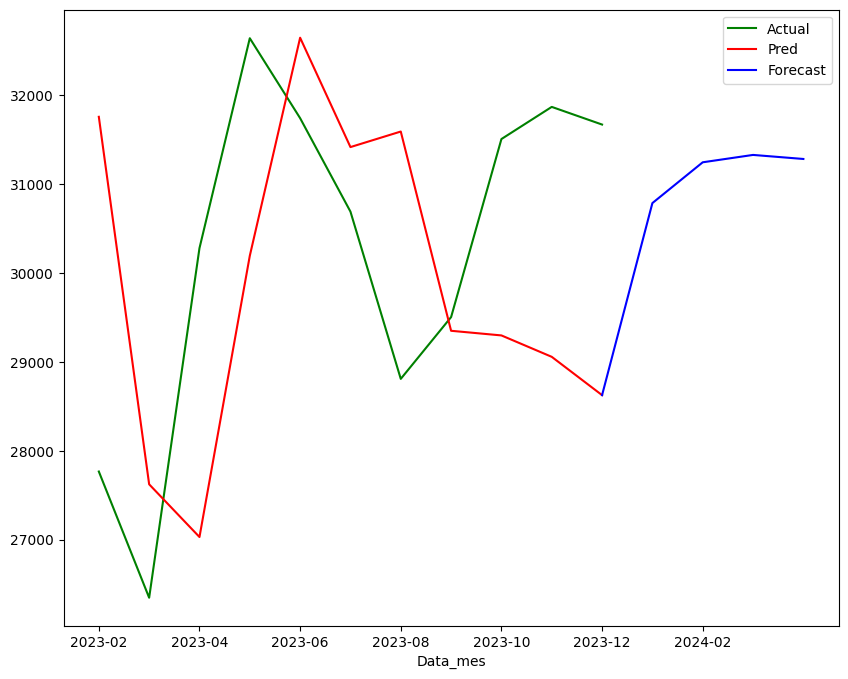

In [140]:
df_forecast[df_forecast.index > '2023-01']["Actual"].plot(figsize=(10,8), legend=True, color="green")
df_forecast[df_forecast.index > '2023-01']["Pred"].plot(legend=True, color="red", figsize=(10,8))
df_forecast[df_forecast.index > '2023-01']["Forecast"].plot(legend=True, color="blue", figsize=(10,8))